## Lab Assignment 01: KEY

 ## WARNING!
 Please note that the questions provided in this assignment are exclusively for your personal use in this course. You are strictly prohibited from distributing, sharing, or publishing these questions in any form or through any medium. This includes, but is not limited to, posting on websites, forums, social media platforms, or sharing with individuals not enrolled in this course. This measure is to ensure the integrity and educational value of the assignment for all students. Thank you for your cooperation and understanding.

Dr. Levent Bulut

## SUBMISSIONS INSTRUCTIONS:
**Google Colab File**: Submit your coding work as a Jupyter notebook file. The file should be named in the following format: "Lab01_LASTNAME_FIRSTINITIAL_SP24". For example, if your name is Leo Bulut, the file name should be "Lab01_Bulut_L_SP24".

**Word Document**: Submit a Word document with the same naming format as above. The Word document should only include your name at the top and your answers to each numbered question. Do not include the questions themselves in the document. Your name should be clearly written at the top of the document.

Please be aware that including the questions in your Word document submission will result in a deduction of points. Ensure you adhere to these guidelines for proper submission.

## Background
* You are being tasked to make sense of bank data.  The dataset in this lab comes from a large financial services firm and includes data from account holders. It focuses on those with home equity lines of credit, auto loans, and other short- to medium-term credit products. The dataset, termed 'BANK01' is a little bit dirty and your job is to clean it.
* A key aspect of the data is the target variable, which indicates the total new sales (INT_TGT).

## Data Dictionary:
#### Target Variable:
* **INT_TGT**: New Sales  (Accepts only non-negative numbers, including zero or NA)

#### Features:
**RFM1**: Average Sales Past Three Years (Accepts only non-negative numbers, including zero or NA)  

**RFM2**: Average Sales Lifetime (Accepts only non-negative numbers, including zero or NA)

**RFM3**: Average Sales Past Three Years Dir Promo Resp (Accepts only non-negative numbers, including zero or NA)

**RFM4**: Last Product Purchase Amount (Accepts only non-negative numbers, including zero or NA)

**RFM5**: Count Purchased Past 3 Years (Accepts only non-negative numbers, including zero or NA)

**RFM6**: Count Purchased Lifetime (Accepts only non-negative numbers, including zero or NA)

**RFM7**: Count Purchased Past 3 Years Dir Promo Resp (Accepts only non-negative numbers, including zero or NA)

**RFM8**: Count Purchased Lifetime Dir Promo Resp (Accepts only non-negative numbers, including zero or NA)

**RFM9**: Months Since Last Purchase (Accepts only non-negative numbers, including zero or NA)

**RFM10**: Count Total Promos Past Year (Accepts only non-negative numbers, including zero or NA)

**RFM11**: Count Direct Promos Past Year (Accepts only non-negative numbers, including zero or NA)

**RFM12**: Customer Tenure (Accepts only non-negative numbers, including zero or NA)

**DEMOG_AGE**: Customer Age Customer Tenure (Accepts only non-negative numbers, including zero or NA. Extremely high age values, anything higher than 130, should be treated as data entry error.)

**DEMOG_GENF**: Female Binary (yes/no)

**DEMOG_GENM**: Male Binary (yes/no)

**DEMOG_HO**: Homeowner Binary (yes/no)

**DEMOG_HOMEVAL**: Home Value (Accepts only non-negative numbers, including zero or NA)

**DEMOG_INC**: Income (Accepts only non-negative numbers, including zero or NA)

**DEMOG_PR**: Percentage retired in the area (Accepts only non-negative numbers including zero or NA. The highest value is 100.)


# Solve the "Spoiled cat problem"!

The "Spoiled Cat Problem" is a complex challenge in data science, resembling an unpredictable, fickle cat. It involves sophisticated data cleaning and analysis, where datasets display confusing, nonlinear patterns. This long-standing scientific puzzle tests advanced data techniques and remains unsolved, symbolizing a quest for clarity in chaotic data.

Well, it turns out that the "Spoiled Cat Problem" was actually a made up concept by your professor. It doesn't really exist. But, we might actually have a cat-related issue. The rumor has it, the only original copy of this dataset was left unattended while the person responsible for the the data collection stepped out for coffee. During this time, her mischievous cat, mistaking the computer mouse for a real one, ended up tampering with the dataset. If you don't believe me, you can consult your cat about such a scenario's likelihood! As a result, simple "Yes" responses may have turned into "Yesssssss," and numerical entries could have been changed to negative or absurdly high values. So, as you work through the questions, please keep this peculiar situation in mind.





## Read data in Google Colab

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)


# from google.colab import data_table
# data_table.enable_dataframe_formatter()




## Call the necessary packages


In [1]:
import pandas as pd
import numpy as np



import seaborn as sns
import matplotlib.pyplot as plt



import matplotlib.pyplot as plt



bank01=pd.read_csv('/Users/Mini/Desktop/bank01.csv')
bank01.columns

mylist=['rfm1', 'rfm5','rfm8']


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc8 in position 10: invalid continuation byte

## Task 1
Your task is to conduct a thorough inspection of each variable in the dataset, keeping in mind the expected values outlined in the data dictionary. Without modifying the data, write a summary that highlights any issues you find for each variable. For example, if there are incorrectly entered 'NA' values, numbers that fall outside the expected range, or any other data inconsistencies, please note these in your response to question 1. Conversely, if a variable appears to have no issues with its data entries, simply state that there are no observed issues with that particular variable.

In [3]:
# If you utilized any coding to answer task 1, please input your code snippets here. Ensure that your codes are error-free when executed.

# check for  target variable and rfm1 -rfm12

# Function to summarize issues in a column, counting all non-numeric entries
def summarize_issues(column):
    is_numeric = pd.to_numeric(column, errors='coerce')
    has_na = column.isna().sum()
    negatives = (is_numeric < 0).sum()
    non_numeric_entries = column[is_numeric.isna()].size - has_na  # Count all non-numeric including original NAs
    return has_na, negatives, non_numeric_entries

# Loop through each RFM column and summarize issues
summary = {}
for col in ['rfm1', 'rfm2', 'rfm3', 'rfm4', 'rfm5', 'rfm6', 'rfm7', 'rfm8', 'rfm9', 'rfm10', 'rfm11', 'rfm12', 'int_tgt','demog_age', 'demog_homeval', 'demog_inc', 'demog_pr']:
    summary[col] = summarize_issues(bank01[col])

# Convert summary to DataFrame for better readability
summary_df = pd.DataFrame(summary, index=['NAs', 'Negatives', 'Non-numeric Entries']).T
print(summary_df)


# Check yes not entries




def count_invalid_entries(df, columns):
    """
    Counts the number of invalid entries (not "YES" or "NO") for specified columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame.
    - columns: List of column names to check.

    Returns:
    - dict: A dictionary with column names as keys and the count of invalid entries as values.
    """
    invalid_counts = {}
    for col in columns:
        # Filter the DataFrame for the current column where values are not "YES" or "NO"
        # and count those rows
        invalid_count = df[~df[col].isin(['yes', 'no'])][col].count()
        invalid_counts[col] = invalid_count
    return invalid_counts

# Assuming bank01 is your DataFrame and it's already defined
columns_to_check = ['demog_genf', 'demog_genm', 'demog_ho']
invalid_entries_count = count_invalid_entries(bank01, columns_to_check)


print()

for column, count in invalid_entries_count.items():
    print(f"Invalid entries in {column}: {count}")



filtered_df = bank01[bank01['demog_pr'] > 100]

# Get the number of rows in the filtered DataFrame
total_entries = filtered_df.shape[0]

# Alternatively, you can use len() function
# total_entries = len(filtered_df)

print(f"Total number of entries where demog_pr is more than 100: {total_entries}")





filtered_df1 = bank01[bank01['demog_age'] > 130]

# Get the number of rows in the filtered DataFrame
total_entries1 = filtered_df1.shape[0]



print(f"Total number of entries where demog_age is more than 130: {total_entries1}")


bank01.columns



                 NAs  Negatives  Non-numeric Entries
rfm1               0          0                    3
rfm2               0          0                    0
rfm3            9912          0                    0
rfm4               0          0                    0
rfm5               0          0                    0
rfm6               0          0                    0
rfm7               0          0                    0
rfm8               0          0                    0
rfm9               0          0                    0
rfm10              0          0                    0
rfm11              0          0                    0
rfm12              0          0                    0
int_tgt            0         21                    0
demog_age      31611          3                    0
demog_homeval      0          1                    1
demog_inc          0          0                    0
demog_pr           0          0                    0

Invalid entries in demog_genf: 3
Invalid entr

Index(['int_tgt', 'demog_age', 'demog_ho', 'demog_homeval', 'demog_inc',
       'demog_pr', 'rfm1', 'rfm2', 'rfm3', 'rfm4', 'rfm5', 'rfm6', 'rfm7',
       'rfm8', 'rfm9', 'rfm10', 'rfm11', 'rfm12', 'demog_genf', 'demog_genm'],
      dtype='object')

## Task 2

Duplicate the original 'bank01' dataset and rename the copy as 'bank_[yourlastname]' (for example, Jane Doe would rename it to 'bank_doe'). Then proceed to make the specified adjustments in your renamed dataset, 'bank_[yourlastname]'


* For any data point that falls outside its expected range, label it as missing in the dataset.
*  Correct any spelling mistakes you encounter. For example, if the expected values are "YES" and "NO", but you find variations like "yes", "YESSSS", or "YESs", adjust them all to the standard form, which in this case would be "YES".


Once you've made the necessary modifications in your dataset, proceed to calculate the number of missing values and the percentage of missing values for each variable. Record your findings in the table provided in the Word document.





In [4]:
# If you utilized any coding to answer task 2, please input your code snippets here. Ensure that your codes are error-free when executed.

bank01_leo=bank01.copy()




# Function to fix issues in a column by converting non-numeric and negative values to NA
def fix_issues(column):
    is_numeric = pd.to_numeric(column, errors='coerce')  # Convert to numeric, non-numeric becomes NaN
    column_fixed = is_numeric.where(is_numeric >= 0, np.nan)  # Replace negative numbers with NaN
    return column_fixed

# Apply fixes to each RFM column
for col in ['rfm1', 'rfm2', 'rfm3', 'rfm4', 'rfm5', 'rfm6', 'rfm7', 'rfm8', 'rfm9', 'rfm10', 'rfm11', 'rfm12', 'int_tgt','demog_age', 'demog_homeval', 'demog_inc', 'demog_pr']:
    bank01_leo[col] = fix_issues(bank01_leo[col])

# Optionally, you can re-check the summary to confirm the fixes
# (You can rerun the summary part here to see the changes)


bank01_leo.loc[bank01_leo['demog_age'] > 130, 'demog_age'] = np.nan
bank01_leo.loc[bank01_leo['demog_pr'] > 100, 'demog_pr'] = np.nan



bank01_leo['demog_genf'] = bank01_leo['demog_genf'].replace(to_replace=[r'^yes.*', r'^no.*'], value=['yes', 'no'], regex=True)
bank01_leo['demog_genm'] = bank01_leo['demog_genm'].replace(to_replace=[r'^yes.*', r'^no.*'], value=['yes', 'no'], regex=True)
bank01_leo['demog_ho'] = bank01_leo['demog_ho'].replace(to_replace=[r'^yes.*', r'^no.*'], value=['yes', 'no'], regex=True)


# Assuming bank01 is your DataFrame

# Calculate the number of missing values for each column
missing_values_count = bank01_leo.isna().sum()

# Calculate the percentage of missing values for each column
missing_values_percentage = (bank01_leo.isna().sum() / len(bank01_leo)) * 100

# Combine the counts and percentages into a single DataFrame for a clearer overview
missing_values_df = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage': missing_values_percentage
})

# Display the DataFrame
print(missing_values_df)





               Missing Values  Percentage
int_tgt                    21    0.016524
demog_age               31616   24.877055
demog_ho                    0    0.000000
demog_homeval               2    0.001574
demog_inc                   0    0.000000
demog_pr                    0    0.000000
rfm1                        3    0.002361
rfm2                        0    0.000000
rfm3                     9912    7.799259
rfm4                        0    0.000000
rfm5                        0    0.000000
rfm6                        0    0.000000
rfm7                        0    0.000000
rfm8                        0    0.000000
rfm9                        0    0.000000
rfm10                       0    0.000000
rfm11                       0    0.000000
rfm12                       0    0.000000
demog_genf                  0    0.000000
demog_genm                  0    0.000000


# Task 3:  Imputation of Missing Values


Dduplicate and modify the 'bank_[yourlastname]' dataset that you saved during Task 2. This new version of the dataset should be named 'bank_[yourlastname]_revised'. For example, if your last name is 'Doe', the new dataset should be named 'bank_doe_revised'. After creating this duplicate, you are to perform a series of data imputation techniques listed below:
 * For a numerical column with missing values, use the mean of the column to fill in the gaps.
* In the case of a categorical column with missing data, use the mode (most frequent value) for imputation. If there are multiple modes, use the first mode to replace missing values.
* Once you have completed the data imputation on the 'bank_[yourlastname]_revised' dataset, your next task is to calculate the descriptive statistics for two specific numerical variables (demog_age and rfm1) and a contingency table between two categorical variables (demog_ho and demog_genf). This step serves as a sanity check to ensure the integrity and reasonableness of your imputed data. Enter your findings in the speficied table in the word document provided.




In [5]:
# If you utilized any coding to answer task 3, please input your code snippets here. Ensure that your codes are error-free when executed.

bank01_leo_revised=bank01_leo.copy()

bank01_leo_revised['demog_genf'] = bank01_leo_revised['demog_genf'].astype('category')
bank01_leo_revised['demog_genm'] = bank01_leo_revised['demog_genm'].astype('category')
bank01_leo_revised['demog_ho'] = bank01_leo_revised['demog_ho'].astype('category')



# Iterate through each column in DataFrame
for column in bank01_leo_revised.columns:
    # Check if the column is numerical
    if bank01_leo_revised[column].dtype in ['int64', 'float64']:
        # Calculate mean of the column excluding NaN values
        mean_value = bank01_leo_revised[column].mean()
        # Replace NaN with the mean value
        bank01_leo_revised[column].fillna(mean_value, inplace=True)
    elif bank01_leo_revised[column].dtype == 'category':
        # Calculate the mode of the column
        mode_value = bank01_leo_revised[column].mode()[0] # In case of multiple modes, .mode()[0] ensures using the first mode
        # Replace NaN with the mode value
        bank01_leo_revised[column].fillna(mode_value, inplace=True)




descriptive_stats = bank01_leo_revised[['demog_age', 'rfm1']].describe()

print(descriptive_stats)




contingency_table = pd.crosstab(bank01_leo_revised['demog_ho'], bank01_leo_revised['demog_genf'])

print(contingency_table)

           demog_age           rfm1
count  127089.000000  127089.000000
mean       60.610476      11.375633
std        15.009369      10.213179
min         0.000000       0.000000
25%        53.000000       6.500000
50%        60.610476      10.000000
75%        72.000000      13.600000
max        89.000000     500.000000
demog_genf     no    yes
demog_ho                
no          21774  35575
yes         31000  38740


/var/folders/d7/wxs6kkgs7x51wmqhjqjy5l6h0000gn/T/ipykernel_65435/3084965565.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank01_leo_revised[column].fillna(mean_value, inplace=True)
/var/folders/d7/wxs6kkgs7x51wmqhjqjy5l6h0000gn/T/ipykernel_65435/3084965565.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

# Task 4


*   Using Python, calculate the **correlation** between the target variable "INT_TGT" and all numeric features in your 'bank_[yourlastname]_revised' dataset. Identify the numeric variable that shows the highest correlation coefficient (in absolute value) with "INT_TGT". Then, create a scatter plot in Python to visually represent the relationship between "INT_TGT" and this highly correlated numeric variable. After completing your plot, insert it into the left pane of the Word document provided for this assignment.
*   Based on the scatter plot you have created, write a brief paragraph discussing your observations. In your analysis, describe the nature of the relationship between the target variable and the numeric variable with the highest correlation coefficient. Is the relationship positive, negative, linear, or non-linear? Provide insights based on the data description and what you can infer from the scatter plot. Your paragraph should offer a clear interpretation of the data visualization, highlighting any notable patterns or trends you observe. Insert your answer to the right pane under Task 4.



In [9]:
bank01_leo_revised.dtypes

int_tgt           float64
demog_age         float64
demog_ho         category
demog_homeval     float64
demog_inc         float64
demog_pr          float64
rfm1              float64
rfm2              float64
rfm3              float64
rfm4              float64
rfm5                int64
rfm6                int64
rfm7                int64
rfm8                int64
rfm9                int64
rfm10               int64
rfm11               int64
rfm12               int64
demog_genf       category
demog_genm       category
dtype: object

In [10]:
unique_values = bank01_leo_revised.apply(pd.Series.unique)
print(unique_values)

int_tgt          [0.0, 11235.67341895678, 1000.0, 2000.0, 2500....
demog_age        [42.0, 39.0, 72.0, 63.0, 60.61047626030396, 53...
demog_ho         ['no', 'yes']
Categories (2, object): ['no', '...
demog_homeval    [90780.0, 191693.0, 141773.0, 35283.0, 500006....
demog_inc        [66811.0, 101626.0, 54565.0, 0.0, 86001.0, 727...
demog_pr         [0.0, 1.0, 24.0, 22.0, 18.0, 35.0, 42.0, 32.0,...
rfm1             [7.4, 5.14, 12.75, 3.67, 15.0, 14.67, 42.5, 8....
rfm2             [6.05, 4.88, 9.0, 3.92, 11.8, 14.67, 35.0, 8.5...
rfm3             [6.75, 5.0, 14.5, 3.25, 15.0, 12.0, 50.0, 9.0,...
rfm4             [10.0, 5.0, 12.0, 15.0, 14.0, 50.0, 7.0, 25.0,...
rfm5             [5, 7, 4, 3, 1, 9, 2, 6, 8, 11, 10, 13, 15, 12...
rfm6             [40, 8, 11, 27, 3, 14, 4, 2, 6, 17, 5, 25, 15,...
rfm7                            [4, 6, 3, 5, 2, 0, 1, 8, 7, 9, 10]
rfm8             [22, 7, 5, 16, 2, 1, 9, 0, 6, 3, 13, 15, 4, 10...
rfm9             [7, 22, 19, 8, 17, 23, 12, 18, 14, 5, 15, 21,

The variable with the highest correlation with INT_TGT is rfm1 (Correlation Coefficient: 0.40519583346868254)


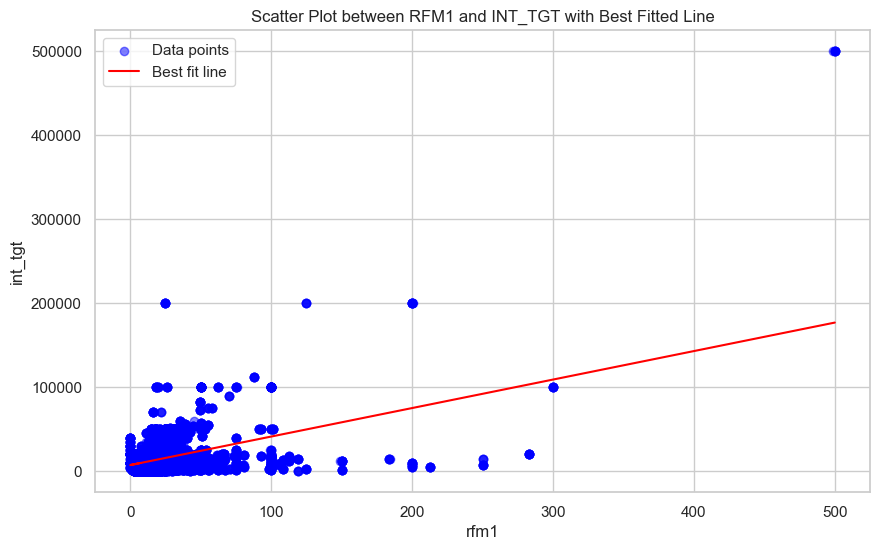

In [11]:
# If you utilized any coding to answer task 4, please input your code snippets here. Ensure that your codes are error-free when executed.

numeric_data = bank01_leo_revised.select_dtypes(include='number')
corr_matrix = numeric_data.corr()

# Calculate correlation matrix
# corr_matrix = bank01_leo_revised.corr()

# Extract correlations with the target variable 'INT_TGT'
int_tgt_corr = corr_matrix['int_tgt']

# Remove the correlation of 'INT_TGT' with itself (which is 1)
int_tgt_corr = int_tgt_corr.drop('int_tgt', axis=0)

# Find the variable with the highest correlation (in absolute value) with 'INT_TGT'
highest_corr_variable = int_tgt_corr.abs().idxmax()
highest_corr_value = int_tgt_corr[highest_corr_variable]

print(f"The variable with the highest correlation with INT_TGT is {highest_corr_variable} (Correlation Coefficient: {highest_corr_value})")





# Extract 'rfm1' and 'INT_TGT' for plotting
x = bank01_leo_revised['rfm1']
y = bank01_leo_revised['int_tgt']

# Calculate the best-fitted line
coefficients = np.polyfit(x, y, 1)  # 1 means linear
polynomial = np.poly1d(coefficients)
y_fit = polynomial(x)  # Calculate the y values based on the fit

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5, label='Data points')
plt.plot(x, y_fit, color='red', label='Best fit line')

# Labeling the plot
plt.title('Scatter Plot between RFM1 and INT_TGT with Best Fitted Line')
plt.xlabel('rfm1')
plt.ylabel('int_tgt')
plt.legend()

# Show the plot
plt.show()





# Task 5: Check for Outliers
In this task, you are required to identify outliers in the numerical variables of the 'bank_[yourlastname]_revised' dataset. You will use the Interquartile Range (IQR) method for this purpose. Additionally, you will create box and whisker plots for both the target variable and the numerical variable that shows the highest correlation (in absolute value) with the target variable.
* In one approach, outliers are the values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR (where Q1 and Q3 are the first and third quartiles, respectively). Identify and list the outliers for each numerical variable and report your findings in the dedicated are in the word document provided. You can  just report the number of outliers detected for each variable.  
* Create a box and whisker plot for the target variable in your dataset and insert it intio the word document.
* Create a box and whisker plot for the numerical variable which shows the higest correlation (in absolute value) with the target variable and insert it intio the word document.  
* What these plots indicate about the distribution of the target variable and the most correlated numerical variable?



Number of outliers detected for each numerical variable:
int_tgt: 1099
demog_age: 2149
demog_homeval: 8448
demog_inc: 2345
demog_pr: 6488
rfm1: 5548
rfm2: 6636
rfm3: 6213
rfm4: 3401
rfm5: 1493
rfm6: 5243
rfm7: 310
rfm8: 2646
rfm9: 19625
rfm10: 24607
rfm11: 14658
rfm12: 44


/var/folders/d7/wxs6kkgs7x51wmqhjqjy5l6h0000gn/T/ipykernel_65435/957546892.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank01_leo_revised, y='int_tgt', width=0.3, palette="coolwarm")


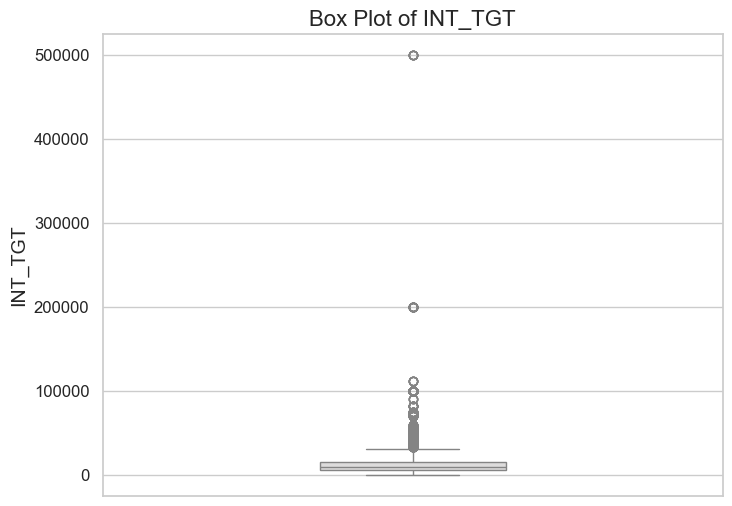

/var/folders/d7/wxs6kkgs7x51wmqhjqjy5l6h0000gn/T/ipykernel_65435/957546892.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank01_leo_revised, y='rfm1', width=0.3, palette="coolwarm")


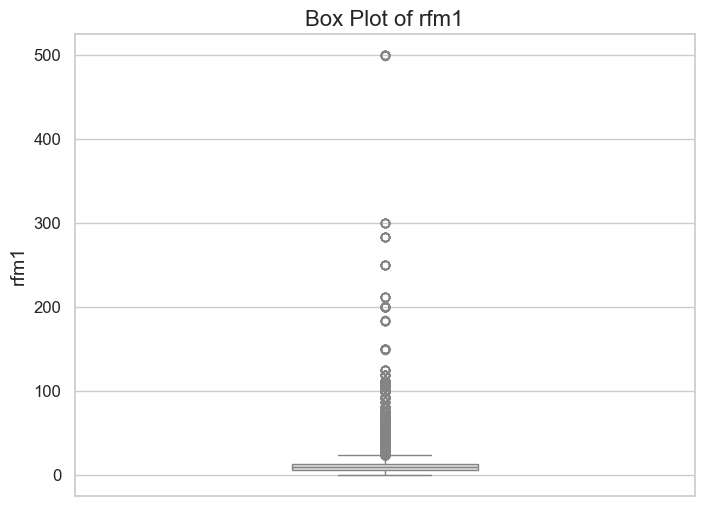

In [7]:
# If you utilized any coding to answer task 5, please input your code snippets here. Ensure that your codes are error-free when executed.


# Function to calculate and return the number of outliers for a column
def find_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identifying outliers
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Iterate over each column in bank01 and find outliers for numerical columns
outliers_summary = {}
for col in bank01_leo_revised.select_dtypes(include=['float64', 'int64']).columns:
    outliers = find_outliers(bank01_leo_revised[col])
    outliers_summary[col] = len(outliers)

# Reporting the number of outliers detected for each numerical variable
print("Number of outliers detected for each numerical variable:")
for col, count in outliers_summary.items():
    print(f"{col}: {count}")





# Assuming bank01 is your DataFrame and it's already loaded

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a box plot for 'INT_TGT' with more style
plt.figure(figsize=(8, 6))
sns.boxplot(data=bank01_leo_revised, y='int_tgt', width=0.3, palette="coolwarm")
plt.title('Box Plot of INT_TGT', fontsize=16)
plt.ylabel('INT_TGT', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Optionally, you can save the plot to a file
# plt.savefig('int_tgt_boxplot.png', dpi=300)

plt.show()





plt.figure(figsize=(8, 6))
sns.boxplot(data=bank01_leo_revised, y='rfm1', width=0.3, palette="coolwarm")
plt.title('Box Plot of rfm1', fontsize=16)
plt.ylabel('rfm1', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Optionally, you can save the plot to a file
# plt.savefig('int_tgt_boxplot.png', dpi=300)

plt.show()


## Read the cleaned data to csv for Lab 02

In [8]:
#for col in bank01_leo_revised.columns:
 #   print(bank01_leo_revised[col].isna().sum())

#bank01_leo_revised.to_csv('bank02.csv', index=False)

bank01_leo_revised['demog_genf'].unique()


['yes', 'no']
Categories (2, object): ['no', 'yes']